# Churn Prediction - whether the customer has left the bank or not

# Binary Classification Problem 

In [2]:
# pip install tensorflow

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Deep Learning\Data\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Understanding the data

- Row Number is just a unique count of rows
- CustomerId - of particular customer
- Surname 
- CreditScore - shows goodness about credits of the customer
- Geography - location
- Gender - gender of the customer
- Age 
- Tenure - how long the customer have been associated with the bank
- Balance - current amount in the bank account of the customer
- NumOfProducts - niumber of products the customer is using from the bank(credit card, debit card, fd, etc)
- HasCrCard - if the customer has credit card
- IsActiveMember - Yes(1)/No(0)
- EstimatedSalary - Estimated salary of the customer acc to bank
- Exited - if the customer left the bank or not

# Here we are using ANN with Keras and Tensorflow. In this code we will train the neural network architecture, use it for prediction and also improvement the model.

- will help to learn back propagation

# Binary Class Classification

In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

# no missing values and the datatype seems good for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df['Exited'].value_counts()

# 7963 people have left the bank while 2037 are still there

# seems to be imbalanced data, but here we are learning ANN(neural network) using Keras

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
df.drop(columns = ['RowNumber','CustomerId','Surname'] , inplace = True)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# we might do some EDS here and find some useful insights

In [14]:
# One hot encoding of columns - ['Geography' , 'Gender']

In [15]:
df = pd.get_dummies(data = df, columns=['Geography' , 'Gender'], drop_first=True)

# drop_first=True means drop the first column i.e eg Gender has 2 values (Male and Female) - so female dropped instead Male column
# me hi values 0&1 ho gyi jaha jaha pe male and female hai

# e.g jaha pe Geography_Germany & Geography_Spain 0,0 hai means it's Spain

In [16]:
df.shape

(10000, 12)

In [17]:
# Independent and dependent features

In [18]:
x = df.drop(columns = 'Exited')
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [19]:
y=df['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# train test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [22]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,1,0,1
5140,626,29,4,105767.28,2,0,0,41104.82,0,0,0
2568,612,47,6,130024.87,1,1,1,45750.21,1,0,0
3671,646,52,6,111739.40,2,0,1,68367.18,1,0,0
7427,714,33,8,122017.19,1,0,0,162515.17,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,1,0,1
7813,684,63,3,81245.79,1,1,0,69643.31,1,0,0
905,672,45,9,0.00,1,1,1,92027.69,0,0,0
5192,663,39,8,0.00,2,1,1,101168.90,0,0,0


In [23]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9953,550,47,2,0.00,2,1,1,97057.28,0,0,1
3850,680,34,3,143292.95,1,1,0,66526.01,0,0,1
4962,531,42,2,0.00,2,0,1,90537.47,0,0,0
3886,710,34,8,147833.30,2,0,1,1561.58,1,0,1
5437,543,30,6,73481.05,1,1,1,176692.65,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3919,763,39,7,0.00,2,1,0,19458.75,0,1,0
162,800,49,7,108007.36,1,0,0,47125.11,0,0,0
7903,567,34,10,0.00,2,0,1,161571.79,0,1,1
2242,621,30,2,101014.08,2,1,1,165257.31,1,0,0


In [24]:
y_train

2694    0
5140    0
2568    1
3671    0
7427    0
       ..
2895    0
7813    1
905     1
5192    0
235     1
Name: Exited, Length: 8000, dtype: int64

In [25]:
y_test

9953    0
3850    0
4962    0
3886    0
5437    0
       ..
3919    0
162     0
7903    0
2242    0
2745    0
Name: Exited, Length: 2000, dtype: int64

# scaling 
- In Neural network values need to be scaled for the smooth convergence of weights.

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [29]:
x_test_scaled # now all the values are scaled

array([[-1.05008411,  0.75175306, -1.01618321, ..., -0.56118125,
        -0.57812007,  0.90179633],
       [ 0.29631699, -0.47907689, -0.67334137, ..., -0.56118125,
        -0.57812007,  0.90179633],
       [-1.24686581,  0.27835693, -1.01618321, ..., -0.56118125,
        -0.57812007, -1.10889783],
       ...,
       [-0.87401628, -0.47907689,  1.72655149, ..., -0.56118125,
         1.72974448,  0.90179633],
       [-0.31474197, -0.85779379, -1.01618321, ...,  1.78195548,
        -0.57812007, -1.10889783],
       [ 0.0373937 ,  1.22514919,  1.38370966, ...,  1.78195548,
        -0.57812007,  0.90179633]])

In [30]:
import tensorflow

In [31]:
from tensorflow import keras

In [32]:
from tensorflow.keras import Sequential

In [33]:
from tensorflow.keras.layers import Dense

In [34]:
# we can build sequential or non sequential model in Keras 
# here we are creating sequential model

In [35]:
model = Sequential()

# we'll create a model 

- 1 input layer
- 1 hidden layer with 3 perceptrons
- 1 output layer

# adding layers to the model

In [36]:
model.add(Dense(3, activation='sigmoid', input_dim =  11)) # hidden layer has 3 nodes
# this is hidden layer which is connected with Input layer with 11 inputs(as our data has 11 columns) and we have used sigmoid as activation function


model.add(Dense(1 , activation='sigmoid')) #output layer

In [37]:
model.summary()
# we have total 40 trainable parameters

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


# model compile stage
- which loss function to be used, which optimizer to be used for gradient descent to modify weights

In [38]:
model.compile(loss= 'binary_crossentropy', optimizer='Adam')

# for binary classification  we use binary_crossentropy as loss function

# we can use any optimizer 

# fitting model

In [39]:
model.fit(x_train_scaled, y_train, epochs=10) # 10 times iteration

# we can see in each epoch loss is reducing i.e. model is getting trained better

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5298
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4973
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4752
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4600
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4493
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4418
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4365
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4330
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4306
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4289


In [40]:
# model is trained now, means all weights and bias has been calculated

In [41]:
model.weights # all weights and bias of all layers in the model

[<tf.Variable 'dense/kernel:0' shape=(11, 3) dtype=float32, numpy=
 array([[ 1.21738784e-01, -3.41079235e-01, -4.95030172e-02],
        [-7.99203455e-01,  1.34009600e+00, -9.91778493e-01],
        [ 2.14623600e-01,  3.27272624e-01,  1.52475312e-02],
        [-4.16169703e-01, -5.05851097e-02,  1.99607089e-02],
        [-3.20586234e-01, -6.75383955e-02,  8.38764668e-01],
        [-1.53336562e-02,  3.91385525e-01,  2.21249044e-01],
        [ 3.95610213e-01, -3.97290081e-01,  8.07640672e-01],
        [-1.56938866e-01, -3.30572501e-02,  7.47671500e-02],
        [-5.10699332e-01,  8.72842312e-01, -2.41179883e-01],
        [-9.46488231e-02,  3.75186980e-01,  1.61093980e-01],
        [ 4.91289496e-01, -9.14270222e-01, -1.34102083e-04]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(3,) dtype=float32, numpy=array([ 0.21835549, -0.19656873,  0.6069717 ], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[-1.4818008 ],
        [ 0.64354235],
     

In [42]:
model.layers[0].get_weights() # 33 weights and 3 bias of 1st layer

[array([[ 1.21738784e-01, -3.41079235e-01, -4.95030172e-02],
        [-7.99203455e-01,  1.34009600e+00, -9.91778493e-01],
        [ 2.14623600e-01,  3.27272624e-01,  1.52475312e-02],
        [-4.16169703e-01, -5.05851097e-02,  1.99607089e-02],
        [-3.20586234e-01, -6.75383955e-02,  8.38764668e-01],
        [-1.53336562e-02,  3.91385525e-01,  2.21249044e-01],
        [ 3.95610213e-01, -3.97290081e-01,  8.07640672e-01],
        [-1.56938866e-01, -3.30572501e-02,  7.47671500e-02],
        [-5.10699332e-01,  8.72842312e-01, -2.41179883e-01],
        [-9.46488231e-02,  3.75186980e-01,  1.61093980e-01],
        [ 4.91289496e-01, -9.14270222e-01, -1.34102083e-04]], dtype=float32),
 array([ 0.21835549, -0.19656873,  0.6069717 ], dtype=float32)]

In [43]:
model.layers[1].get_weights() # 3 weights and 1 bias of 2nd layer

[array([[-1.4818008 ],
        [ 0.64354235],
        [-1.6619179 ]], dtype=float32),
 array([-0.08459209], dtype=float32)]

In [44]:
model.predict(x_test_scaled)

63/63 [==============================] - 0s 2ms/step


array([[0.09722516],
       [0.15547849],
       [0.12380423],
       ...,
       [0.0556773 ],
       [0.1643782 ],
       [0.37997684]], dtype=float32)

In [45]:
# here output is not 0&1 as we are using sigmoid function which gives any output between 0 & 1, so we convert the O/P to 0 & 1

# threshold = 0.5 (let) if value<0.5, customer will leave the bank else not

output = model.predict(x_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [46]:
type(output)

numpy.ndarray

In [47]:
len(output)

2000

In [48]:
output[1]

array([0.15547849], dtype=float32)

In [49]:
y_pred = np.where(output > 0.5 ,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8075

# we can imporve accuracy 

- increasing number of epochs
- change activation functions 
- increase number od hidden layers
- increase number of nodes in layers

In [51]:
model1 = Sequential()

In [52]:
model1.add(Dense(11, activation='relu', input_dim =  11)) # hidden layer has 11 nodes
# this is hidden layer which is connected with Input layer with 11 inputs(as our data has 11 columns) and we have used sigmoid as activation function
# activation function 'relu' used

# adding 1 more hidden layer with 11 nodes

model1.add(Dense(11, activation= 'relu'))

model1.add(Dense(1 , activation='sigmoid')) #output layer with 1 node

In [53]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [54]:
model1.compile(loss = 'binary_crossentropy' , optimizer= 'Adam', metrics= ['accuracy'])

In [55]:
model1.fit(x_train_scaled , y_train , epochs=10, validation_split=0.2)

# training data me se 20% data to be used as validation
# now it is showing training loss and accuracy as well as validation loss and accuracy in every epoch

# Goal is loss should reduce and accuracy should improve
# training accuracy b bdhni chaiye and validation accuracy as well keeping in mind overfitting na ho

Epoch 1/10


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


200/200 [==============================] - 2s 4ms/step - loss: 0.5740 - accuracy: 0.7075 - val_loss: 0.4795 - val_accuracy: 0.7975
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4547 - accuracy: 0.7972 - val_loss: 0.4494 - val_accuracy: 0.7994
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4355 - accuracy: 0.8048 - val_loss: 0.4337 - val_accuracy: 0.8081
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.8138 - val_loss: 0.4223 - val_accuracy: 0.8175
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8228 - val_loss: 0.4128 - val_accuracy: 0.8225
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8308 - val_loss: 0.4003 - val_accuracy: 0.8363
Epoch 7/10
200/200 [==============================] - 1s 2ms/step - loss: 0.3899 - accuracy: 0.8408 - val_loss: 0.3871 - val_accuracy: 0.8431
Epoch 8/10
200/20

In [56]:
model1.layers[0].get_weights()  # 121 weights and 11 bias for first layer

[array([[-0.20798184, -0.00560145, -0.00520676, -0.19214778,  0.31634027,
          0.23460124,  0.04897809,  0.11491124, -0.42349154, -0.18701208,
          0.03638822],
        [-0.6616199 ,  0.18962109,  0.27995977,  0.5971632 , -0.21577603,
         -0.32412025, -0.2740887 , -0.8361106 ,  0.13485892,  0.0154671 ,
          0.12164784],
        [-0.13939969,  0.10576264,  0.06263401,  0.33548817, -0.40798968,
         -0.16907442, -0.20718995,  0.12146961, -0.3283257 ,  0.1841204 ,
         -0.08687749],
        [ 0.13895825,  0.5224453 , -0.06488484, -0.44748378, -0.38044685,
          0.5672606 ,  0.508321  , -0.2028641 ,  0.2010354 , -0.37940332,
          0.4773974 ],
        [-0.0262467 , -0.1619328 , -0.81082034,  1.1392542 ,  0.22804692,
          0.726335  , -0.2463429 , -0.02863117, -0.97433484, -0.03519724,
          0.8393334 ],
        [-0.20954317,  0.09685066, -0.16591696,  0.2894787 , -0.09299286,
         -0.27563256,  0.37201077,  0.19762878,  0.32405367,  0.1554749

In [57]:
out = model1.predict(x_test_scaled)
out

63/63 [==============================] - 0s 1ms/step


array([[0.05705019],
       [0.10313207],
       [0.08566494],
       ...,
       [0.05113971],
       [0.05307423],
       [0.26296845]], dtype=float32)

In [58]:
y_pred_1 = np.where(out>0.5, 1,0)
y_pred_1

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [59]:
accuracy_score(y_pred_1 , y_test)

0.855

# Here accuracy is improved

# Some graphs for performance of neural network

In [60]:
import matplotlib.pyplot as plt

In [61]:
history = model1.fit(x_train_scaled , y_train , epochs=10, validation_split=0.2)

Epoch 1/10
 28/200 [===>..........................] - ETA: 0s - loss: 0.3784 - accuracy: 0.8426

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


200/200 [==============================] - 1s 3ms/step - loss: 0.3526 - accuracy: 0.8567 - val_loss: 0.3585 - val_accuracy: 0.8487
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3492 - accuracy: 0.8569 - val_loss: 0.3564 - val_accuracy: 0.8506
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3464 - accuracy: 0.8598 - val_loss: 0.3541 - val_accuracy: 0.8506
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3448 - accuracy: 0.8606 - val_loss: 0.3543 - val_accuracy: 0.8569
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3430 - accuracy: 0.8602 - val_loss: 0.3514 - val_accuracy: 0.8494
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3418 - accuracy: 0.8606 - val_loss: 0.3514 - val_accuracy: 0.8487
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3405 - accuracy: 0.8617 - val_loss: 0.3512 - val_accuracy: 0.8500
Epoch 8/10
200/20

In [62]:
history.history # a dictionary for value of training loss, training accuracy, validation loss and validation accuracy at each epochs

{'loss': [0.35255736112594604,
  0.3492017090320587,
  0.3463527262210846,
  0.34478941559791565,
  0.34297680854797363,
  0.34184494614601135,
  0.3404790163040161,
  0.34008410573005676,
  0.3384004831314087,
  0.3381325602531433],
 'accuracy': [0.8567187786102295,
  0.8568750023841858,
  0.8598437309265137,
  0.8606250286102295,
  0.860156238079071,
  0.8606250286102295,
  0.8617187738418579,
  0.8589062690734863,
  0.8598437309265137,
  0.8615624904632568],
 'val_loss': [0.35845696926116943,
  0.35638606548309326,
  0.3540579080581665,
  0.3542531728744507,
  0.3514173626899719,
  0.35139739513397217,
  0.351196825504303,
  0.35028794407844543,
  0.3507836163043976,
  0.34894129633903503],
 'val_accuracy': [0.8487499952316284,
  0.8506249785423279,
  0.8506249785423279,
  0.8568750023841858,
  0.8493750095367432,
  0.8487499952316284,
  0.8500000238418579,
  0.8493750095367432,
  0.8512499928474426,
  0.8512499928474426]}

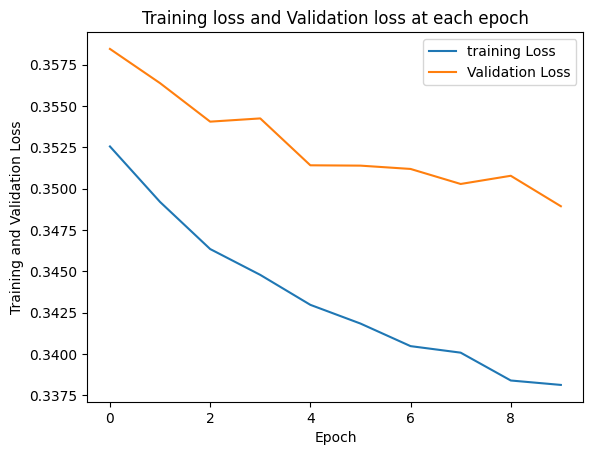

In [63]:
plt.plot(history.history['loss'], label = 'training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title("Training loss and Validation loss at each epoch")
plt.xlabel("Epoch")
plt.ylabel("Training and Validation Loss")
plt.legend()
plt.show()

# at epoch=6, training and validation loss were at minimum

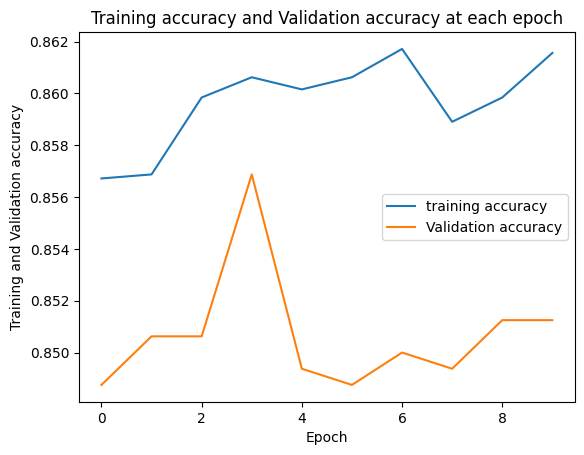

In [64]:
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.title("Training accuracy and Validation accuracy at each epoch")
plt.xlabel("Epoch")
plt.ylabel("Training and Validation accuracy")
plt.legend()
plt.show()

# at epoch=6, training and validation loss were at minimum